### Introduction to neural networks

<img src="1.png" width="500" style="display: block; margin: 0 auto;"/>

$f$: activation function. We always use Sigmod function as the activation function.
<img src="2.png" width="250" style="display: block; margin: 0 auto;" />


### Perceptron

If there are two layers of neurons, it is "Perceptron":

This is a picture describing that two input in "Perceptron".
<img src="3.png" width="250" style="display: block; margin: 0 auto;" />
At this time, we have:
$$
y=f(\sum_iw_ix_i-\theta)
$$


The parameters can be learned given by lots of training datas $(x_i, y_i)$.
$$
w_i\leftarrow w_i+\Delta w_i ,\\\Delta w_i=\eta(y-\hat{y})x_i ,
$$

### BackPropagation(more layers than perceptron)

Given data:
$$
D=\{(x_1,y_1), (x_2,y_2), ..., (x_m,y_m)\}, \quad x_i\in R^d, y_i\in R^l
$$


In [139]:
import numpy as np
import matplotlib.pyplot as plt

Epoch 0, Loss: 0.4044804799815229
Epoch 1000, Loss: 0.18134031539118126
Epoch 2000, Loss: 0.1728180254868281
Epoch 3000, Loss: 0.16548798785468602
Epoch 4000, Loss: 0.14672326004993044
Epoch 5000, Loss: 0.10382904898387413
Epoch 6000, Loss: 0.054152632127331235
Epoch 7000, Loss: 0.030224234280828908
Epoch 8000, Loss: 0.018762350944502564
Epoch 9000, Loss: 0.012522346080511122
训练后的输出：
[[0.99930208]
 [0.95612378]
 [0.94447147]
 [0.99609093]
 [0.94887374]
 [0.82287547]
 [0.8196437 ]
 [0.9394065 ]
 [0.00481621]
 [0.00273251]
 [0.00487501]
 [0.1749741 ]
 [0.05818098]
 [0.15819959]
 [0.13187904]
 [0.00431927]
 [0.00365429]]


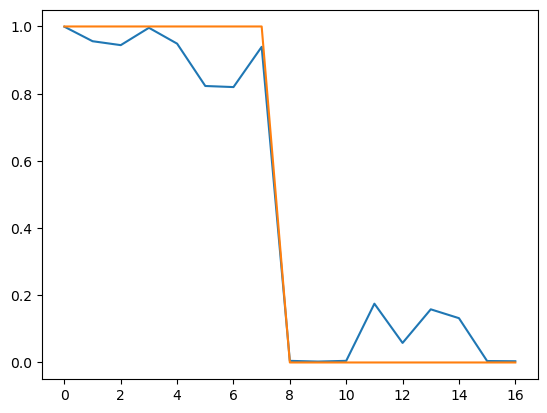

In [140]:
# Sigmoid激活函数及其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 初始化数据 (西瓜书数据集例子)
# 每行数据包括特征（除去最后一列）和标签（最后一列）
data = np.array([
    [0.697, 0.460, 1],
    [0.774, 0.376, 1],
    [0.634, 0.264, 1],
    [0.608, 0.318, 1],
    [0.556, 0.215, 1],
    [0.403, 0.237, 1],
    [0.481, 0.149, 1],
    [0.437, 0.211, 1],
    [0.666, 0.091, 0],
    [0.243, 0.267, 0],
    [0.245, 0.057, 0],
    [0.343, 0.099, 0],
    [0.639, 0.161, 0],
    [0.657, 0.198, 0],
    [0.360, 0.370, 0],
    [0.593, 0.042, 0],
    [0.719, 0.103, 0]
])

# 特征和标签
X = data[:, :2]     # 两个特征：密度和含糖率
y = data[:, 2].reshape(-1, 1)  # 标签（好瓜/坏瓜）

# 初始化神经网络的参数
input_neurons = X.shape[1]  # 输入层神经元数
hidden_neurons = 4          # 隐藏层神经元数，可以调整
output_neurons = 1          # 输出层神经元数（好瓜/坏瓜）

# 初始化权重和偏置
np.random.seed(42)          # 固定随机数种子，保证每次结果一样
weights_input_hidden = np.random.rand(input_neurons, hidden_neurons)
weights_hidden_output = np.random.rand(hidden_neurons, output_neurons)
bias_hidden = np.random.rand(1, hidden_neurons)
bias_output = np.random.rand(1, output_neurons)

# 定义超参数
learning_rate = 0.1
epochs = 10000

# 训练BP算法
for epoch in range(epochs):
    # 前向传播
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # 计算误差
    error = y - predicted_output

    # 反向传播
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # 更新权重和偏置
    weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # 打印训练进度
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# 显示最终输出
print("训练后的输出：")
print(predicted_output)


plt.plot(predicted_output)
plt.plot(Y)

训练后的输出：
[0.99111534 0.93511285 0.97597397 0.99079187 0.98578203 0.91627173
 0.90029596 0.90280171 0.00939511 0.06324972 0.01886379 0.04872134
 0.07411508 0.07046104 0.10595621 0.03997698 0.06008624]
真实标签的输出：
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


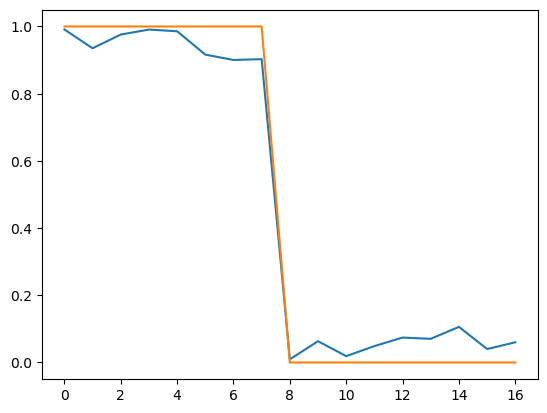

In [168]:
import sys
sys.path.append('../dataset')
import data3

data = data3.createDataSet()[0]
for row in data:
    row[:] = [1 if x == '青绿' else x for x in row]
    row[:] = [0.75 if x == '乌黑' else x for x in row]
    row[:] = [0.5 if x == '浅白' else x for x in row]
    row[:] = [1 if x == '蜷缩' else x for x in row]
    row[:] = [0.75 if x == '稍蜷' else x for x in row]
    row[:] = [0.5 if x == '硬挺' else x for x in row]
    row[:] = [1 if x == '浊响' else x for x in row]
    row[:] = [0.75 if x == '沉闷' else x for x in row]
    row[:] = [0.5 if x == '清脆' else x for x in row]
    row[:] = [1 if x == '清晰' else x for x in row]
    row[:] = [0.75 if x == '稍糊' else x for x in row]
    row[:] = [0.5 if x == '模糊' else x for x in row]
    row[:] = [1 if x == '凹陷' else x for x in row]
    row[:] = [0.75 if x == '稍凹' else x for x in row]
    row[:] = [0.5 if x == '平坦' else x for x in row]
    row[:] = [1 if x == '硬滑' else x for x in row]
    row[:] = [0.5 if x == '软粘' else x for x in row]
    row[:] = [1 if x == '好瓜' else x for x in row]
    row[:] = [0 if x == '坏瓜' else x for x in row]

# Sigmoid  and its derivate
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x) 

# define features and labels (x,y)
data = np.array(data)
X = data[:,:-1]
# X = np.delete(X, slice(0, 6), axis=1) 删除第1到6列
X = np.delete(X, slice(2, 4), axis=1)
Y = data[:,-1]

# 初始化神经网络的参数
input_neurons = X.shape[1]  # 输入层神经元数
hidden_neurons = 4          # 隐藏层神经元数，可以调整
output_neurons = 1          # 输出层神经元数（好瓜/坏瓜）

learning_rate = 0.1

# 初始化权重和偏置
np.random.seed(42)          # 固定随机数种子，保证每次结果一样
weights_input_hidden = np.random.rand(input_neurons, hidden_neurons)
weights_hidden_output = np.random.rand(hidden_neurons, output_neurons)
bias_hidden = np.random.rand(1, hidden_neurons)
bias_output = np.random.rand(1, output_neurons)

for iter in range(10000):
    # forward
    hidden_layer_input = X@weights_input_hidden + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)

    output_layer_input = hidden_layer_activation@weights_hidden_output + bias_output
    predicted_output = sigmoid(output_layer_input)
    predicted_output = predicted_output.reshape(17,)

    error = Y - predicted_output

    # backward
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = np.outer(d_predicted_output, weights_hidden_output)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # update
    weights_hidden_output += (hidden_layer_activation.T@d_predicted_output*learning_rate).reshape((hidden_neurons,1))
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T@d_hidden_layer * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    
# 显示最终输出
print("训练后的输出：")
print(predicted_output)
print("真实标签的输出：")
print(Y)

plt.plot(predicted_output)
plt.plot(Y)